# ACDC dataset

Visualise distribution the floor

In [1]:
import datasets
import torch.utils.data as data
import torch
import wandb
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
train_dataset = datasets.ACDCDataset("/home/guests/manal_hamdi/manal/TGRAFT/datasets/ACDC_processed/", "training",19, 'group', True)
train_loader = data.DataLoader(train_dataset, batch_size=1, pin_memory=False, shuffle=True, num_workers=4, drop_last=True)

In [3]:
img, tmp, _ = train_dataset[1]

In [4]:
print(img.shape)

torch.Size([19, 216, 256])


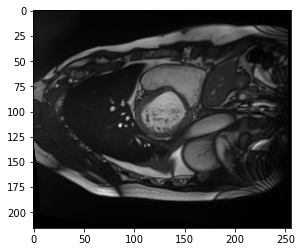

In [6]:
plt.imshow(img[0,:,:], cmap="gray")

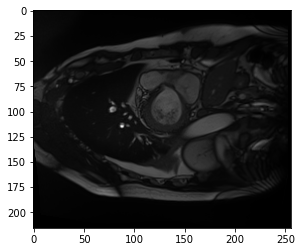

In [8]:
plt.imshow(img[10,:,:], cmap="gray")

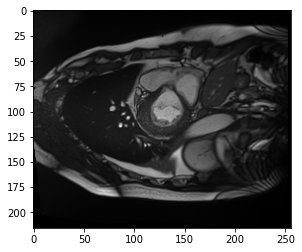

In [7]:
plt.imshow(img[18,:,:], cmap="gray")

In [18]:
dict_h = {}
dict_w = {}
dict_s = {}
for i in range(0, len(train_dataset)):
    img, tmp, _ = train_dataset[i]
    s, h, w = img.shape
    dict_h[h] = 0
    dict_w[w] = 0
    dict_s[s] = 0
for i in range(0, len(train_dataset)):
    img, tmp, _ = train_dataset[i]
    s, h, w = img.shape
    dict_h[h] += 1
    dict_w[w] += 1
    dict_s[s] += 1

In [19]:
all_h = []
all_count_h = []
all_w = []
all_count_w = []
all_s = []
all_count_s = []
for h, count_h in dict_h.items():
    all_h.append(h)
    all_count_h.append(count_h)

for w, count_w in dict_w.items():
    all_w.append(w)
    all_count_w.append(count_w)
for s, count_s in dict_s.items():
    all_s.append(s)
    all_count_s.append(count_s)


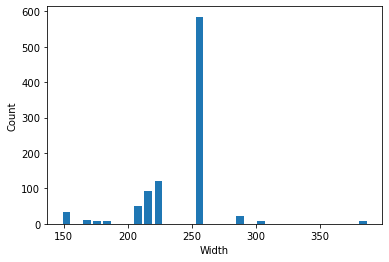

In [20]:
plt.bar(all_w, all_count_w, width=6)
plt.xlabel('Width')
plt.ylabel('Count')
'''
plt.subplot(133)
plt.bar(all_s, all_count_s)
plt.xlabel('Sequence length')
plt.ylabel('Count')
'''
plt.show()


In [3]:
test_dataset = datasets.ACDCDataset("/home/peter_studt/Manal/TGRAFT/datasets/ACDC_processed/", "testing",19, 'group', True)

In [13]:
print(seq_original.repeat(1, 1,1,1).shape)

torch.Size([1, 19, 216, 256])


In [17]:
seq_original, _, patient_name = test_dataset[12]
print(patient_name)

patient102_z_1


In [15]:
for i in range(len(test_dataset)):
    seq_original, _, patient_name = test_dataset[i]
    if (patient_name == 'patient113_z_3' or patient_name == 'patient102_z_1' or patient_name == 'patient123_z_3'):
        print(i)
        print(seq_original.shape)


1
torch.Size([15, 208, 168])
12
torch.Size([19, 216, 256])
51
torch.Size([19, 216, 256])


KeyboardInterrupt: 

In [15]:
seq_original, _, patient_name = test_dataset[1]
seq_len, h, w = seq_original.shape
print(seq_original.shape)
seq1 = seq_original[1,:,:].repeat(seq_len, 1, 1)
assert torch.equal(seq_original[1,:,:],seq1[1,:,:])

torch.Size([19, 232, 256])


We visualize 1 sequence and its corresponding template using average.

In [88]:
import sequence_handling_utils as seq_utils
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import torch.utils.data as data


In [4]:
import torch
import datasets as datasets
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [89]:
train_dataset = datasets.ACDCDataset("../datasets/ACDC_processed/", "training", 19, False)
loader = data.DataLoader(train_dataset, batch_size=1, shuffle=True)

In [92]:
for i_batch, data_blob in enumerate(loader):
    image_batch, template_batch, patient_slice_id_batch = [x for x in data_blob]
    break

In [6]:
seq = train_dataset[99][0]
pca_temp = train_dataset[10][1]
print(pca_temp.shape)
name = train_dataset[10][2]

torch.Size([19, 232, 256])


In [75]:
s_len, h, w = seq.shape
seq_n = seq.numpy()
seq_flat = np.zeros((s_len, h*w)) # [5000, 15]

for i in range(0, s_len):
    seq_flat[i] = seq[i,:,:].flatten()
seq_flat = np.transpose(seq_flat) #[h*w, s], each col represents an image

sc = StandardScaler(with_std=False)
X_cent = sc.fit_transform(seq_flat) # standarize and scale

pca = PCA(n_components=1)
rslt_proj_pca = pca.fit_transform(X_cent)    # projected data
print(torch.from_numpy(np.transpose(pca.components_)).shape)
my_proj = torch.matmul(torch.from_numpy(X_cent), torch.from_numpy(np.transpose(pca.components_)))

X_cent_inves = pca.inverse_transform(rslt_proj_pca)
print(my_proj.shape, rslt_proj_pca.shape)
assert np.allclose(my_proj.numpy(), rslt_proj_pca)

print("The projected data after PCA is X . Components_T")
#assert np.allclose(X_cent, X_cent_inves)
#print("Inverted is the same as original")

template = torch.from_numpy(rslt_proj_pca.reshape(h,w))


torch.Size([19, 1])
torch.Size([53248, 1]) (53248, 1)
The projected data after PCA is X . Components_T


In [85]:
import wandb
wandb.init(project="test-project", entity="manalteam")

In [94]:
wandb.log({" Images ": [wandb.Image(pca_temp, caption= " Image GT")]})
wandb.log({"HAHA template ": [wandb.Video(pca_temp, fps=2, caption="Image gt" , format="gif"),
                             wandb.Video(template_batch, fps=2, caption="Image Pred" , format="gif"),
                             wandb.Video(template.repeat(1,1,1,1), fps=2, caption="Template gt" , format="gif"),
                             wandb.Video(template.repeat(1,1,1,1), fps=2, caption="Template pred" , format="gif"),
                             wandb.Video(template.repeat(1,1,1,1), fps=2, caption="Forward Flow" , format="gif"),
                             wandb.Video(template.repeat(1,1,1,1), fps=2, caption="Backward Flow" , format="gif"),
                             wandb.Video(template.repeat(1,1,1,1), fps=2, caption="Img Error" , format="gif")]})

In [10]:
a = torch.tensor([[[1.0,2.0],[3.0,4.0]],[[5.0,6.0],[7.0, 8.0]]])
print(a.shape)
m = torch.mean(a)
print(m)

torch.Size([2, 2, 2])
tensor(4.5000)


In [18]:
wandb.log({"PCA template": [wandb.Image(pca_temp[10])]}) 

In [19]:
gif = pca_temp.numpy()
wandb.log({"GIF": [wandb.Video(gif, fps=2, caption="Image gt" , format="gif")]})

# -------------------------------------------------------------------------------------------

In [21]:
X = torch.tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9],
                  [10, 11, 12],
                  [13, 14, 15]])
print(X.shape)
sc = StandardScaler()
X_cent = sc.fit_transform(X) # standarize and scale
pca = PCA(n_components=1)
Y_cent = pca.fit_transform(X)
XX_cent = pca.inverse_transform(Y_cent)
assert np.array_equal(XX_cent, X)

torch.Size([5, 3])


In [13]:
def construct_template_pca(seq):
    '''seq is a tensor with shape [N, H, W]'''
    s_len, h, w = seq.shape
    seq = seq[:,:,:].numpy() #[N, H, W]
    # Flatten the images in the seq 
    seq_flat = np.zeros((s_len, h*w)) # [5000, 15]

    for i in range(0, s_len):
        seq_flat[i] = seq[i,:,:].flatten()
    
    seq_flat = np.transpose(seq_flat) #[h*w, s], each col represents an image
    sc = StandardScaler()
    seq_flat = sc.fit_transform(seq_flat) # standarize and scale
    
    #pca = PCA(n_components=lvl_conf, svd_solver='full')
    pca = PCA(n_components=19)
    
    seq_flat_transformed = pca.fit_transform(seq_flat)
    X = pca.inverse_transform(seq_flat_transformed)
    assert (X == seq_flat).all()
    print("HA lm39ol")
    
    assert np.array_equal(seq_flat, seq_flat_transformed)
    assert np.array_equal(me, seq_flat)
    
    print(seq_flat_transformed.shape, seq_flat.shape)
    print(seq_flat_transformed[0])
    print(seq_flat[0])
    assert np.array_equal(seq_flat, seq_flat_transformed)
    #template = seq_flat_transformed.reshape(h, w)
    #return torch.tensor(template)
    return seq_flat_transformed

In [6]:
p = construct_template_pca(seq)

AssertionError: 

In [200]:
X = torch.tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9],
                  [10, 11, 12],
                  [13, 14, 15]])
pca = PCA(n_components=3)
Y = pca.fit_transform(X)
XX = pca.inverse_transform(Y)

In [201]:
assert XX_cent.all() == XX.all()

In [25]:
X = torch.tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9],
                  [10, 11, 12],
                  [13, 14, 15]])
print(X.shape)
sc = StandardScaler()
X_cent = sc.fit_transform(X) # standarize and scale
pca = PCA(n_components=3, svd_solver='full')
Y = pca.fit_transform(X_cent)
XX = pca.inverse_transform(Y)
print(X)
print(XX)
assert np.array_equal(X, XX)
proj = np.dot(X, np.transpose(pca.components_))
print(Y)
print(proj)
assert np.array_equal(Y, proj)

torch.Size([5, 3])
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])
[[-1.41421356e+00 -1.41421356e+00 -1.41421356e+00]
 [-7.07106781e-01 -7.07106781e-01 -7.07106781e-01]
 [ 6.16297582e-33  2.46519033e-32  1.84889275e-32]
 [ 7.07106781e-01  7.07106781e-01  7.07106781e-01]
 [ 1.41421356e+00  1.41421356e+00  1.41421356e+00]]


AssertionError: 

In [174]:
toto = torch.tensor([[[1,4,5],[3,6,12]],[[2,3,4],[12,55,5]]])
print(toto.shape)

torch.Size([2, 2, 3])


In [4]:
print(len(train_dataset))

943


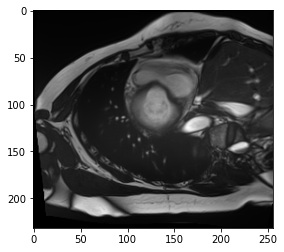

In [8]:
template = seq_utils.generate_template(seq, "pca")
plt.imshow(template, cmap='gray')

In [5]:
for i in range(len(train_dataset)):
    if (train_dataset[i][2] == "patient020_z_4"):
        indx_patient020_z_4 = i
        break

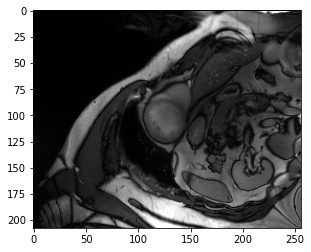

In [26]:
plt.imshow(pca_temp[0,:,:], cmap='gray')

# Validation

In [ ]:
volume = nib.load(args.acdc_folder +"" + volume_path).get_fdata()

In [26]:
from sklearn.preprocessing import StandardScaler

def construct_template_pca(seq, lvl_conf):
    '''seq is a tensor with shape [B, N, H, W]'''
    b, s_len, h, w = seq.shape
    assert b == 1
    seq = seq[0,:,:,:].numpy() #[N, H, W]
    # Flatten the images in the seq 
    seq_flat = np.zeros((s_len, h*w)) # [5000, 15]

    for i in range(0, s_len):
        seq_flat[i] = seq[i,:,:].flatten()
    seq_flat = np.transpose(seq_flat) #[h*w, s], each col represents an image
    sc = StandardScaler()
    seq_flat = sc.fit_transform(seq_flat)
    
    #pca = PCA(n_components=lvl_conf, svd_solver='full')
    pca = PCA(9)
    
    seq_flat_transformed = pca.fit_transform(seq_flat)
    pca_template = seq_flat_transformed[:,0].reshape(h, w)
    #print(pca.explained_variance_ratio_[0])
    assert pca.explained_variance_ratio_[0] > 0.79, print(pca.explained_variance_ratio_[0])
    return torch.tensor(pca_template)

This is 1 sequence


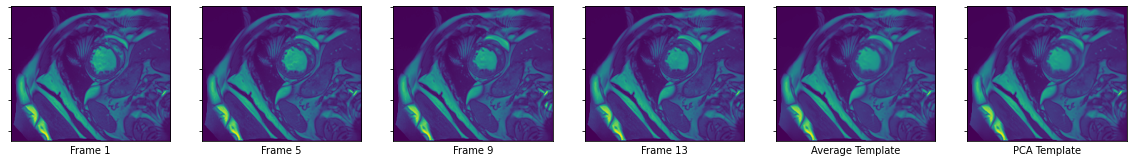

In [27]:
print("This is 1 sequence")
train_dataset = datasets.ACDCDataset("../datasets/ACDC_processed/", "training", max_seq_len=15)
seq1, avg_tmp = train_dataset[35]
pca_tmp = construct_template_pca(seq1.view(1,seq1.shape[0], seq1.shape[1], seq1.shape[2]), 0.9)

fig = plt.figure(figsize=(20, 20))
columns = 6
rows = 1
j = 1
for i in range(1, columns*rows +1):
    if (j == 17):
        fig.add_subplot(rows, columns, i)
        plt.imshow(avg_tmp[0,:,:])
        plt.xlabel("Average Template")
        plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False,  labelleft=False) 
        j += 4
        continue
    if (j == 21):
        fig.add_subplot(rows, columns, i)
        plt.imshow(pca_tmp)
        plt.xlabel("PCA Template")
        plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False,  labelleft=False)
        j += 4
        break
        
    fig.add_subplot(rows, columns, i)
    plt.imshow(seq1[j,:,:])
    plt.xlabel("Frame " + str(j))
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False,  labelleft=False) 
    j += 4

        
plt.show()


In [30]:
assert torch.all(avg_tmp[0,:,:].eq(pca_tmp))

AssertionError: 

In [23]:
print(seq1[1,0,1])
print(avg_tmp[1,0,1])

tensor(0.0050, dtype=torch.float64)
tensor(0.0013, dtype=torch.float64)


In [50]:
train_dataset = datasets.ACDCDataset("../datasets/ACDC_processed/", "training", max_seq_len=15)
seq1, template = train_dataset[10]

In [51]:
cuda_to_use = 0
seq2 = seq1[None].to(cuda_to_use)

In [52]:
assert seq1.all() == seq2.all()

This is 1 sequence


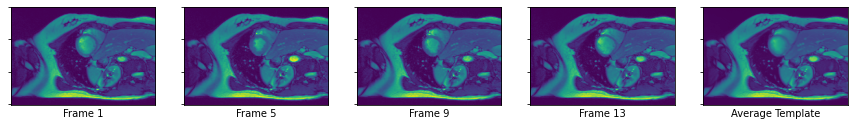

In [53]:
print("This is 1 sequence")
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 1
j = 1
for i in range(1, columns*rows +1):
    if (j == 17):
        fig.add_subplot(rows, columns, i)
        plt.imshow(template[0,:,:])
        plt.xlabel("Average Template")
        plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False,  labelleft=False) 
        break
    fig.add_subplot(rows, columns, i)
    plt.imshow(seq1[j,:,:])
    plt.xlabel("Frame " + str(j))
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False,  labelleft=False) 
    j += 4

        
plt.show()

Text(0.5, 0, 'Average Template')

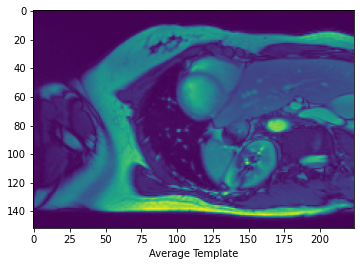

In [54]:
plt.imshow(template[0,:,:])
plt.xlabel("Average Template")

PCA


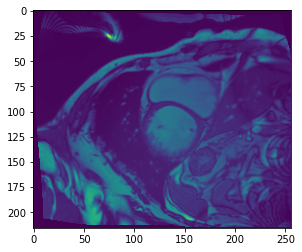

In [55]:
plt.imshow(tmp)
print("PCA")

In [56]:
assert tmp.all() == template[0,:,:].all()

AssertionError: 

## Data Exploration - Range of image intensity

In [57]:
for i in range(0, len(train_dataset)):
    seq1, _ = train_dataset[i]
    len_seq, H, W = seq1.shape
    min_it = 1000
    max_it = 0
    for s in range(0, len_seq):
        for h in range(0, H):
            for w in range(0, W):
                if (seq1[s, h, w] < min_it):
                    min_it = seq1[s, h, w]
                if (seq1[s, h, w] > max_it):
                    max_it = seq1[s, h, w]
    print("Range of intensity of pixels in seq", i, "is [", min_it.item(), ",", max_it.item(), "].")
            

KeyboardInterrupt: 

In [33]:
# Importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
    

In [58]:
train_dataset = datasets.ACDCDataset("../datasets/ACDC_processed/", "training", max_seq_len=15)
seq, template = train_dataset[150]
print(seq.shape)

torch.Size([15, 224, 256])


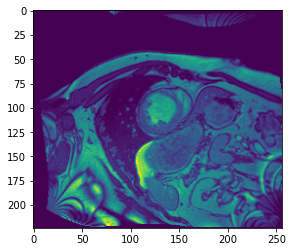

In [59]:
plt.imshow(seq[4,:,:].numpy())

seq_n.shape (15, 224, 256)
flat_imgs.shape (15, 57344)
flat_imgs.shape (57344, 15)


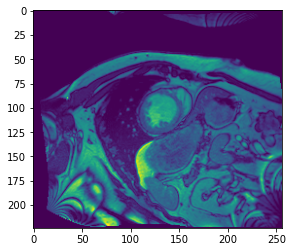

In [60]:
seq_n = seq.numpy()
print("seq_n.shape", seq_n.shape)
flat_imgs = np.zeros((seq_n.shape[0], seq_n.shape[1]*seq_n.shape[2]))

for i in range(0, seq_n.shape[0]):
    flat_imgs[i] = seq_n[i,:,:].flatten()
print("flat_imgs.shape", flat_imgs.shape)
flat_imgs = np.transpose(flat_imgs)
print("flat_imgs.shape", flat_imgs.shape)
plt.imshow(np.reshape(flat_imgs[:,0], (seq_n.shape[1],seq_n.shape[2])))

In [61]:
#pca = PCA(n_components=0.99, svd_solver='full')
pca = PCA(9)
 
#Applying to red channel and then applying inverse transform to transformed array.
flat_imgs_transformed = pca.fit_transform(flat_imgs) #principalComponents
#flat_imgs_inverted = pca.inverse_transform(flat_imgs_transformed)
print(flat_imgs_transformed.shape)
print(pca.n_components_)

sing_all = pca.singular_values_.sum()
print("Percentage of singular values")
print(pca.singular_values_)
for i in range(0, 15):
    print("{:.2f}".format(pca.singular_values_[:i+1].sum() * 100 / sing_all), "%")


(57344, 9)
9
Percentage of singular values
[180.81248995  16.49786178   7.76273035   4.59795898   4.39540347
   3.68203573   3.01422608   2.54233197   2.33424196]
80.13 %
87.45 %
90.89 %
92.92 %
94.87 %
96.50 %
97.84 %
98.97 %
100.00 %
100.00 %
100.00 %
100.00 %
100.00 %
100.00 %
100.00 %


In [62]:
print(pca.explained_variance_)

[5.70133347e-01 4.74651559e-03 1.05086902e-03 3.68680166e-04
 3.36912468e-04 2.36426191e-04 1.58442335e-04 1.12715621e-04
 9.50191920e-05]


In [69]:
v_l = []
for i in range(0, len(train_dataset)):
    seq, _ = train_dataset[i]
    v, tmp = construct_template_pca(seq.view(1,seq.shape[0], seq.shape[1], seq.shape[2]), 0.9)
    v_l.append(v)

ValueError: too many values to unpack (expected 2)

In [21]:
count = {}
for i in range(0, len(train_dataset)):
    count[v_l[i]] = 0
for i in range(0, len(train_dataset)):
    count[v_l[i]] += 1
count = dict(sorted(count.items()))
C, V = [], []
for key, value in count.items():
    print(key)
    C.append(value)
    V.append(key)

IndexError: list index out of range

NameError: name 'V' is not defined

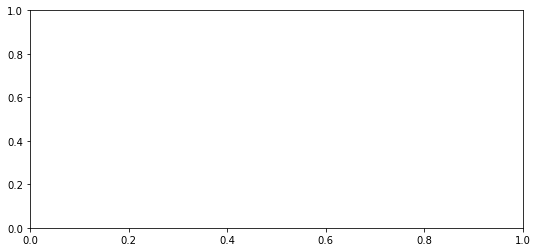

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 4))
plt.subplot(131)

plt.bar(V, C, width=1)
plt.xlabel('Explained variance by the template')
plt.ylabel('Count')

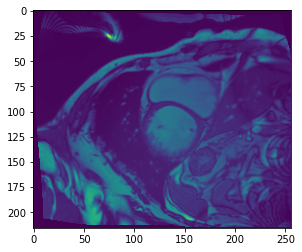

In [23]:
plt.imshow(tmp)


In [24]:
'''
    print("n_com_", pca.n_components_)

    template = np.zeros((h * w))
    for j in range(0, pca.n_components_):
        template += pca.singular_values_[j] * seq_flat_transformed[:,j] # CHECK
        
    template = template.reshape(h, w)
    return torch.tensor(template)
'''

'\n    print("n_com_", pca.n_components_)\n\n    template = np.zeros((h * w))\n    for j in range(0, pca.n_components_):\n        template += pca.singular_values_[j] * seq_flat_transformed[:,j] # CHECK\n        \n    template = template.reshape(h, w)\n    return torch.tensor(template)\n'

tensor(-4.1693, dtype=torch.float64) 0.0


AssertionError: 

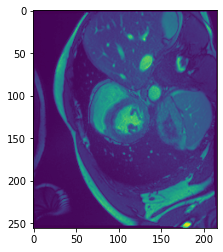

In [25]:
dog_seq = seq[0,:,:].repeat(15, 1, 1)
assert dog_seq[0,:,:].all() == seq[0,:,:].all()
dog_tmp = construct_template_pca(dog_seq.view(1,dog_seq.shape[0], dog_seq.shape[1], dog_seq.shape[2]), 1)
plt.imshow(dog_tmp)
print(dog_tmp[0,0], seq[0,0,0].numpy())
assert dog_tmp[0,0].all() == seq[0,0,0].numpy().all()